# Building structured multi-plot grids

When exploring multi-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either "lattice" or "trellis" plotting, and it is related to the idea of `"small multiples"`. It allows a viewer to quickly extract a large amount of information about a complex dataset. Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of your dataset.

The `figure-level` functions are built on top of the objects discussed in this Module. In most cases, you will want to work with those functions. They take care of some important bookkeeping that synchronizes the multiple plots in each grid. This Module explains how the underlying objects work, which may be useful for advanced applications.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks") # Set the theme for the plots
import numpy as np
np.random.seed(sum(map(ord, "axis_grids"))) # For reproducibility



## Conditional small multiples
---------------------------

The `FacetGrid` class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A `FacetGrid` can be drawn with up to three dimensions: ``row``, ``col``, and ``hue``. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

Each of `relplot`, `displot`, `catplot`, and `lmplot` use this object internally, and they return the object when they are finished so that it can be used for further tweaking.

The class is used by initializing a `FacetGrid` object with a dataframe and the names of the variables that will form the row, column, or hue dimensions of the grid. These variables should be categorical or discrete, and then the data at each level of the variable will be used for a facet along that axis. For example, say we wanted to examine differences between lunch and dinner in the ``tips`` dataset:

In [2]:
tips = sns.load_dataset("tips")
print(tips.info())
tips.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


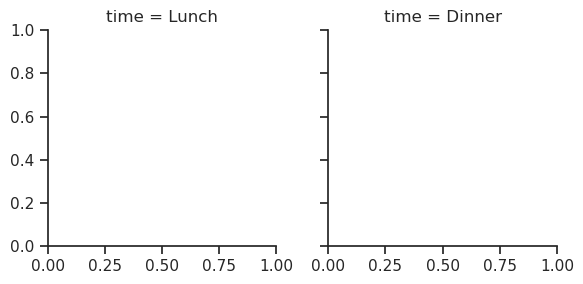

In [3]:
g = sns.FacetGrid(tips, # Create a grid for faceting
                  col="time") # Column-wise faceting by 'time' variable, we have two, Lunch and Dinner
#we create two plots, one for Lunch and one for Dinner, but are not displaying any data yet because we have not mapped any data to the grid

Initializing the grid like this sets up the matplotlib figure and axes, but doesn't draw anything on them.

The main approach for visualizing data on this grid is with the `FacetGrid.map` method. Provide it with a plotting function and the name(s) of variable(s) in the dataframe to plot. Let's look at the distribution of tips in each of these subsets, using a histogram:

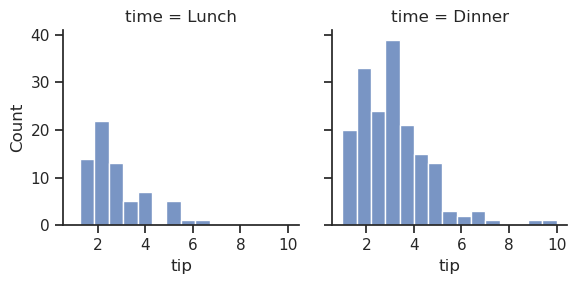

In [4]:
g = sns.FacetGrid(tips, # Create a grid for faceting, this must be in the same code cell as this is what "prints" the grid
                  col="time") # Column-wise faceting by 'time' variable, we have two, Lunch and Dinner
# we assign a plot type to the grid (g), now we map a histogram to each facet
g.map(sns.histplot, "tip")# Plot histogram of 'tip' variable in each facet



This function will draw the figure and annotate the axes, hopefully producing a finished plot in one step. To make a relational plot, just pass multiple variable names. You can also provide keyword arguments, which will be passed to the plotting function:

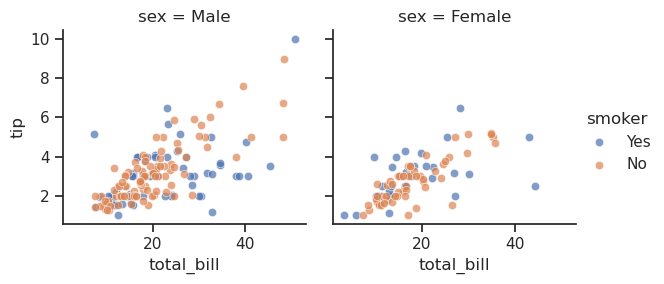

In [8]:
g = sns.FacetGrid(tips, col="sex", hue="smoker") # Create a grid with column-wise faceting by 'sex' and hue by 'smoker' status, use the tips dataset
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7) # Map a scatter plot of 'total_bill' vs 'tip' to the grid with some transparency
g.add_legend() # Add a legend to the grid to explain the hue colors

There are several options for controlling the look of the grid that can be passed to the class constructor.

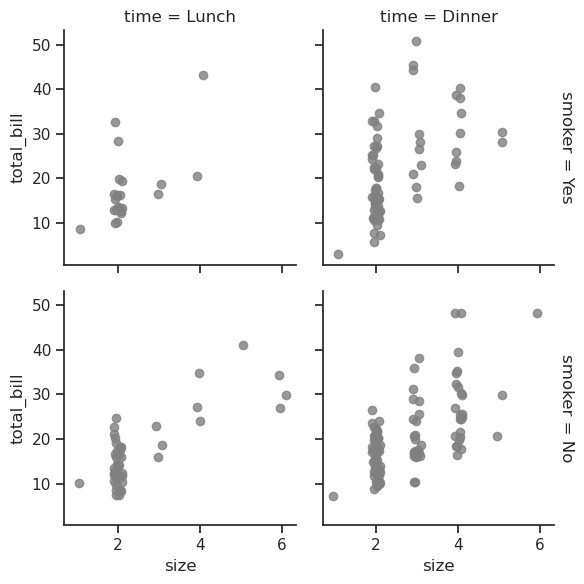

In [ ]:
g = sns.FacetGrid(tips, row="smoker", col="time", # Create a grid with row-wise faceting by 'smoker' status and column-wise by 'time'
                  margin_titles=True) # Add margin titles for better readability
g.map(sns.regplot, "size", "total_bill", # Map a regression plot of 'size' vs 'total_bill' to each facet
      color="grey", # Set the color of the regression line and points
      fit_reg=False, # Do not fit a regression line
      x_jitter=.1) # Add some jitter to the x-axis for better visibility of points
# This creates a grid of scatter plots showing the relationship between 'size' and 'total_bill

Note that ``margin_titles`` isn't formally supported by the matplotlib API, and may not work well in all cases. In particular, it currently can't be used with a legend that lies outside of the plot.

The size of the figure is set by providing the height of *each* facet, along with the aspect ratio:

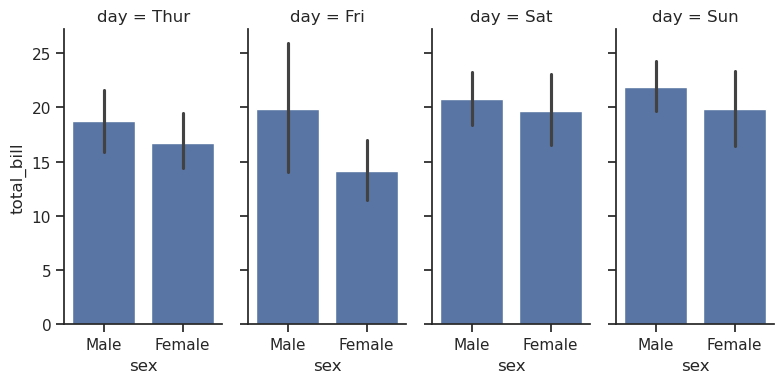

In [14]:
g = sns.FacetGrid(tips, col="day",  # Create a grid with column-wise faceting by 'day'
                  height=4, aspect=.5) # Set the height and aspect ratio of each facet
g.map(sns.barplot, "sex", "total_bill", # Map a bar plot of 'sex' vs 'total_bill' to each facet, each bar represents average total bill for that sex
      #errorbar=None, # remove error bars
      order=["Male", "Female"]) # Specify the order of categories on the x-axis

The default ordering of the facets is derived from the information in the DataFrame. If the variable used to define facets has a categorical type, then the order of the categories is used. Otherwise, the facets will be in the order of appearance of the category levels. It is possible, however, to specify an ordering of any facet dimension with the appropriate ``*_order`` parameter:

In [ ]:
ordered_days = tips.day.value_counts().index # Get the days ordered by frequency
ordered_days

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category', name='day')

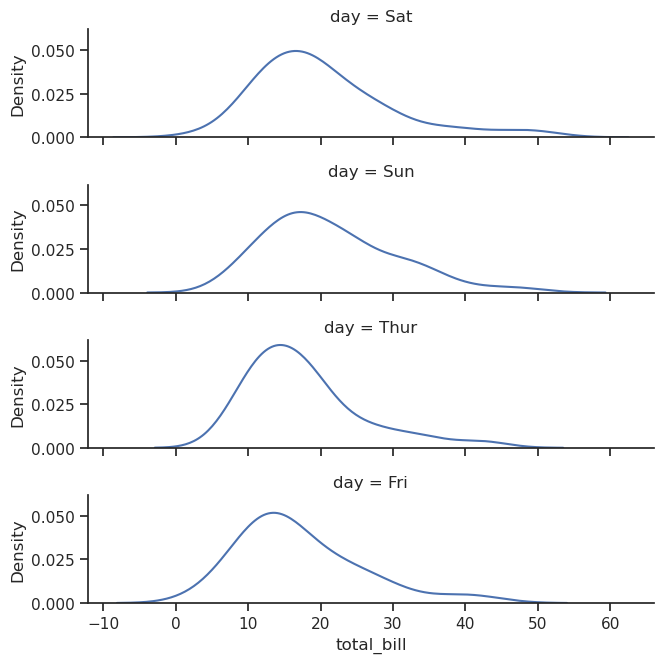

In [ ]:
g = sns.FacetGrid(tips, row="day", # Create a grid with row-wise faceting by 'day' we could change the row to col to have column-wise faceting
                  row_order=ordered_days,# Specify the order of rows based on frequency
                  height=1.7, aspect=4,) # Set the height and aspect ratio of each facet
g.map(sns.kdeplot, "total_bill") # Map a kernel density estimate plot of 'total_bill' to each facet

Any seaborn color palette (i.e., something that can be passed to `color_palette()`) can be provided. You can also use a dictionary that maps the names of values in the ``hue`` variable to valid matplotlib colors:

In [19]:
pal = dict(Lunch="seagreen", Dinner="grey")
pal

{'Lunch': 'seagreen', 'Dinner': 'grey'}

In [20]:
pal_dict = {"Lunch":"seagreen", 
       "Dinner":"grey"}
pal_dict

{'Lunch': 'seagreen', 'Dinner': 'grey'}

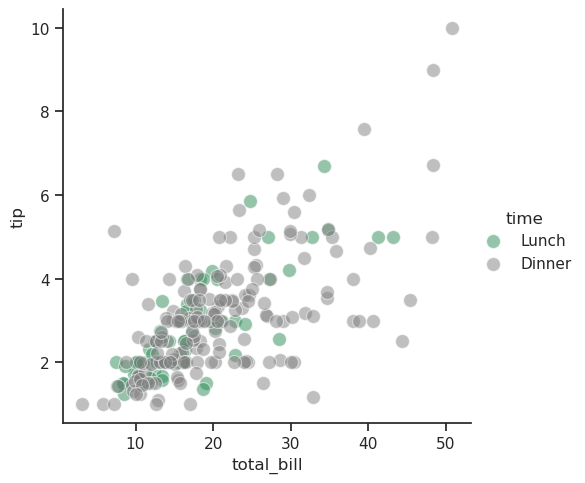

In [ ]:
g = sns.FacetGrid(tips, hue="time", # Create a grid with hue based on 'time' variable, dataset is tips
                  palette=pal, # Use the custom color palette defined earlier from the dictionary
                  height=5) # Set the height of the plot to 5 inches

g.map(sns.scatterplot, "total_bill", "tip", # Map a scatter plot of 'total_bill' vs 'tip' to the grid
      s=100, # Set the size of the scatter plot points
      alpha=.5) # Set the transparency of the points
g.add_legend() # Add a legend to explain the hue colors

If you have many levels of one variable, you can plot it along the columns but "wrap" them so that they span multiple rows. When doing this, you cannot use a ``row`` variable.

In [3]:
attend = sns.load_dataset("attention").query("subject <= 12") # Load the attention dataset and filter for subjects less than or equal to 12
print(attend.info())
attend.head()


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 51
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36 non-null     int64  
 1   subject     36 non-null     int64  
 2   attention   36 non-null     object 
 3   solutions   36 non-null     int64  
 4   score       36 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


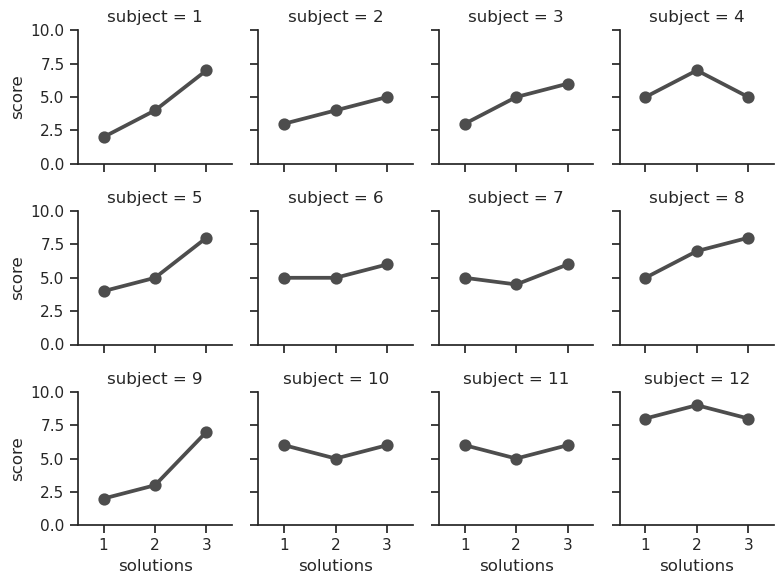

In [ ]:
g = sns.FacetGrid(attend, col="subject", # Create a grid with column-wise faceting by 'subject'
                  col_wrap=4, # Wrap the columns after every 4 facets, this is needed because we have many subjects 
                  height=2, # Set the height of each facet
                  ylim=(0, 10)) # Set the y-axis limits for all facets

g.map(sns.pointplot, "solutions", "score", # Map a point plot of 'solutions' vs 'score' to each facet
      order=[1, 2, 3], # Specify the order of 'solutions' on the x-axis
      color="black", # Set the color of the points and lines
      errorbar=None) # Do not display error bars

Once you've drawn a plot using`FacetGrid.map` (which can be called multiple times), you may want to adjust some aspects of the plot. There are also a number of methods on the `FacetGrid` object for manipulating the figure at a higher level of abstraction. The most general is `FacetGrid.set`, and there are other more specialized methods like `FacetGrid.set_axis_labels`, which respects the fact that interior facets do not have axis labels. For example:

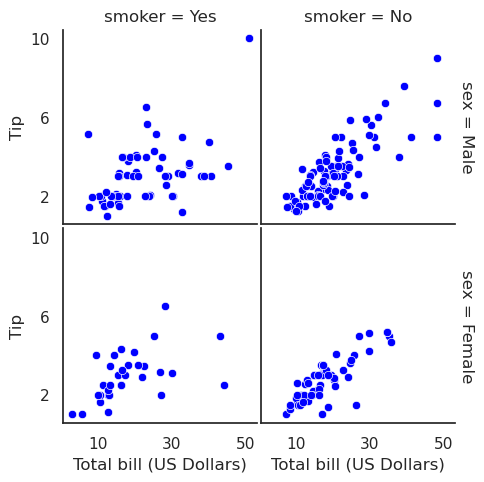

In [ ]:
with sns.axes_style("white"): # Use a white background style for the plot, the with statement ensures this style is applied only within its block
    g = sns.FacetGrid(tips, row="sex", col="smoker", # Initialize a FacetGrid with row-wise faceting by 'sex' and column-wise by 'smoker' status
                      margin_titles=True, # Add margin titles for better readability
                      height=2.5) # Set the height of each facet
    
g.map(sns.scatterplot, "total_bill", "tip",  # Map a scatter plot of 'total_bill' (x-axis) vs 'tip' (y-axis) to each facet
      color="blue") # Set the color of the scatter plot points to blue
g.set_axis_labels("Total bill (US Dollars)", "Tip") # Set custom axis labels for the x and y axes
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]) # Set specific tick marks for the x and y axes
g.figure.subplots_adjust(wspace=.02, hspace=.02) # Adjust the spacing between subplots for better layout. wspace is the width space, hspace is the height space

For even more customization, you can  work directly with the underling matplotlib ``Figure`` and ``Axes`` objects, which are stored as member attributes at ``figure`` and ``axes_dict``, respectively. When making a figure without row or column faceting, you can also use the ``ax`` attribute to directly access the single axes.

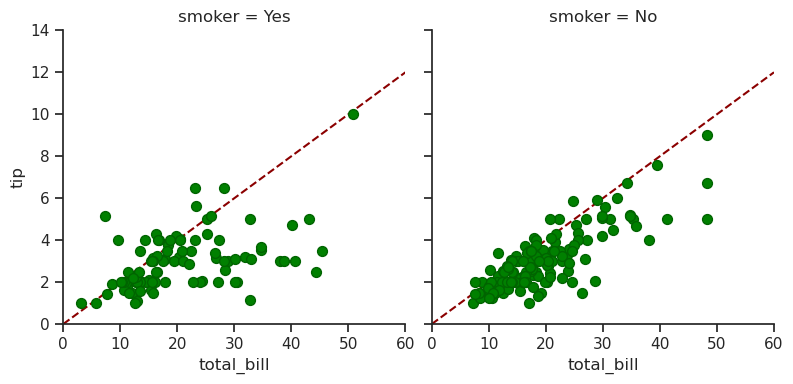

In [13]:
#Initialize a FacetGrid and assign it to g
g = sns.FacetGrid(tips, col="smoker", #dataset, column-wise faceting by 'smoker' status
                  margin_titles=True, # Add margin titles for better readability
                  height=4)# Set the height of each facet

g.map(plt.scatter, "total_bill", "tip", #use matplotlib's scatter function (plt.scatter) to plot 'total_bill' vs 'tip'
      color="green", # Set the color of the scatter plot points to green, try other colors as well 
      edgecolor="darkgreen", # Set the edge color of the scatter plot points to white, try other colors as well
      s=50, # Set the size of the scatter plot points to 50, try other sizes as well
      lw=1) # Set the edgecolor line width of the scatter plot points to 1, try other widths as well

for ax in g.axes_dict.values(): # Iterate over each axis in the FacetGrid (g.axes_dict)
    ax.axline((0, 0), # Draw a reference line on each axis
              slope=.2, # Set the slope of the reference line to 0.2
              c="darkred", # Set the color of the reference line to red
              ls="--", # Set the line style of the reference line to dashed
              zorder=0) # Set the z-order of the reference line to 0 (drawn behind other plot elements)
    
g.set(xlim=(0, 60), ylim=(0, 14)) # Set the x and y axis limits for all facets in the FacetGrid (g)

Because `matplotlib.pyplot.scatter` accepts ``color`` and ``label`` keyword arguments and does the right thing with them, we can add a hue facet without any difficulty:

## Plotting pairwise data relationships
------------------------------------

`PairGrid` also allows you to quickly draw a grid of small subplots using the same plot type to visualize data in each. In a `PairGrid`, each row and column is assigned to a different variable, so the resulting plot shows each pairwise relationship in the dataset. This style of plot is sometimes called a "scatterplot matrix", as this is the most common way to show each relationship, but `PairGrid` is not limited to scatterplots.

It's important to understand the differences between a `FacetGrid` and a `PairGrid`. In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship (although the upper and lower triangles will have mirrored plots). Using `PairGrid` can give you a very quick, very high-level summary of interesting relationships in your dataset.

The basic usage of the class is very similar to `FacetGrid`. First you initialize the grid, then you pass plotting function to a ``map`` method and it will be called on each subplot. There is also a companion function, `pairplot` that trades off some flexibility for faster plotting.


In [7]:
iris = sns.load_dataset("iris")
print(iris.info())
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


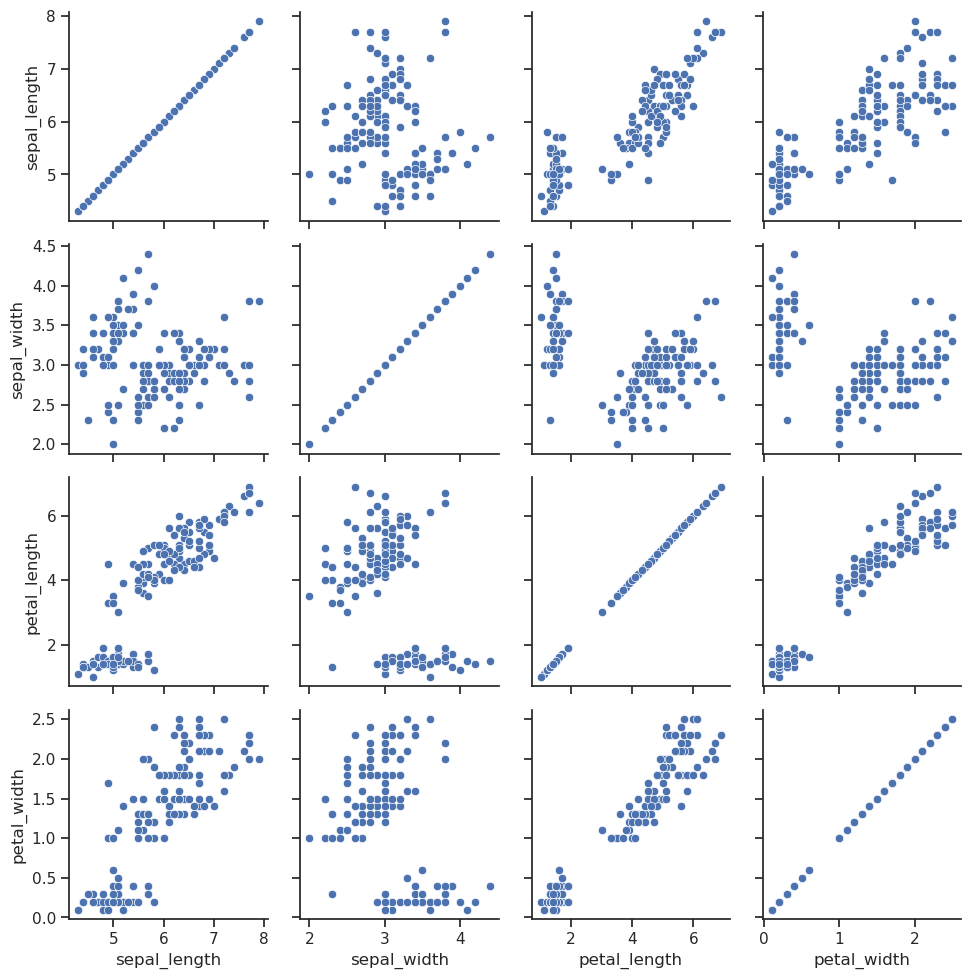

In [ ]:
g = sns.PairGrid(iris) # Initialize a PairGrid with the iris dataset, remember, the pairgrid creates a matrix of plots for each pair of variables
g.map(sns.scatterplot) # Map a scatter plot to each pair of variables in the dataset

It's possible to plot a different function on the diagonal to show the univariate distribution of the variable in each column. Note that the axis ticks won't correspond to the count or density axis of this plot, though.

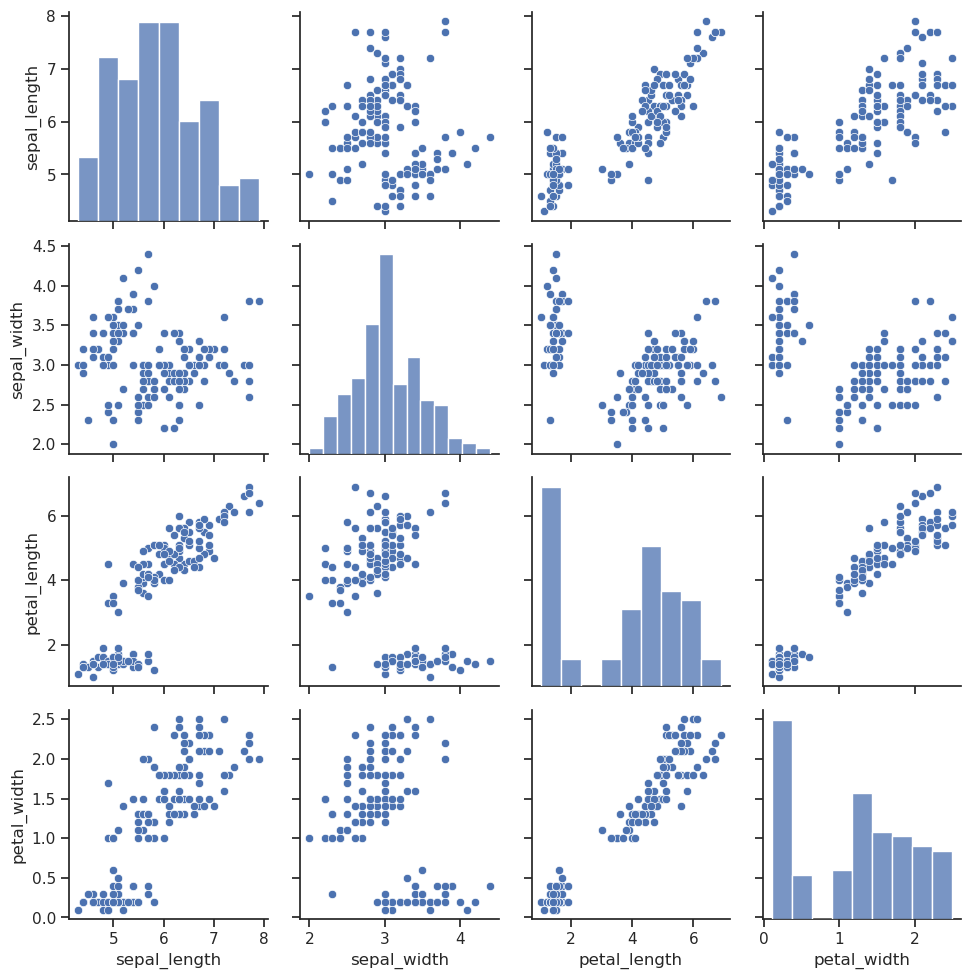

In [23]:
g = sns.PairGrid(iris, diag_sharey=False) # Initialize a PairGrid with the iris dataset
g.map_diag(sns.histplot)# Map a histogram to the diagonal subplots (map_diag is used for the diagonal subplots)
g.map_offdiag(sns.scatterplot) # Map a scatter plot to the off-diagonal subplots (map_offdiag is used for the off-diagonal subplots)
#g.map_lower(sns.scatterplot) # Map a scatter plot to the lower triangle subplots (map_lower is used for the lower triangle subplots) - no duplicates
#running both map_offdiag and map_lower will result in duplicate plots on either side of the diagonal, but different colors


A very common way to use this plot colors the observations by a separate categorical variable. For example, the iris dataset has four measurements for each of three different species of iris flowers so you can see how they differ.

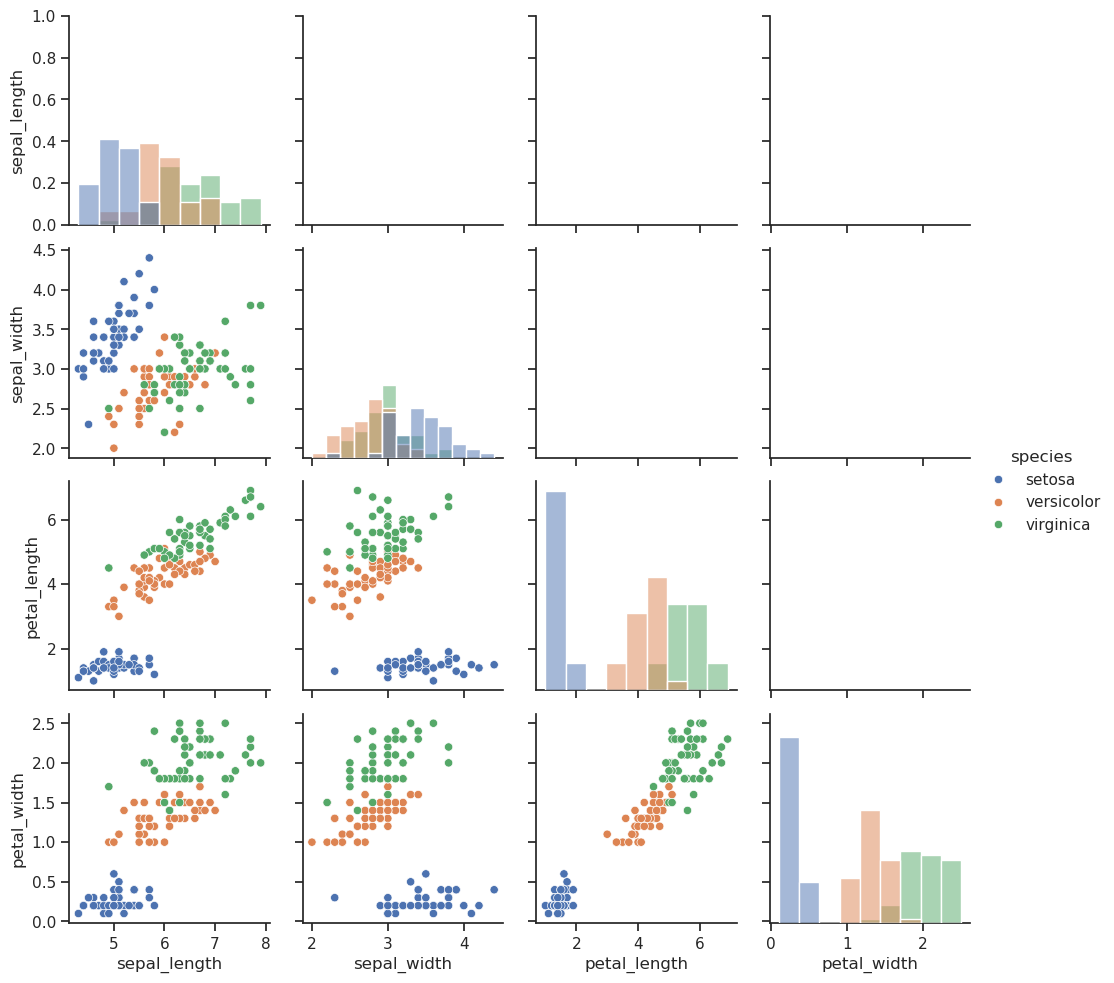

In [28]:
#initialize a PairGrid and assign it to g
g = sns.PairGrid(iris, hue="species") # Initialize with the iris dataset, using 'species' for hue to differentiate species by color
g.map_diag(sns.histplot)#map the diagonal with histograms
#g.map_diag(sns.histplot, kde=True) #map the diagonal with kdes
#g.map_upper(sns.scatterplot) #map the upper triangle with scatter plots
g.map_lower(sns.scatterplot) #map the lower triangle with scatter plots
    
g.add_legend() # Add a legend to explain the hue colors

By default every numeric column in the dataset is used, but you can focus on particular relationships if you want.

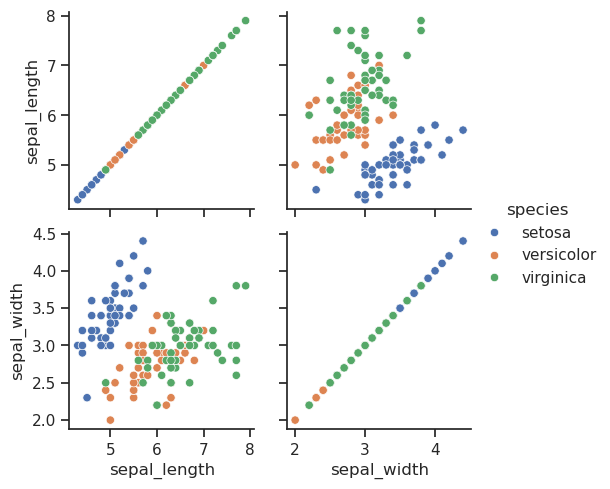

In [30]:
#initialize a PairGrid with specific variables and assign it to g
g = sns.PairGrid(iris,  #use the iris dataset
                 vars=["sepal_length", "sepal_width"], #specify the variables to include in the grid
                 hue="species") #set the hue to 'species' to differentiate species by color
g.map(sns.scatterplot) # Map a scatter plot to each pair of specified variables
g.add_legend() # Add a legend to explain the hue colors

It's also possible to use a different function in the upper and lower triangles to emphasize different aspects of the relationship.

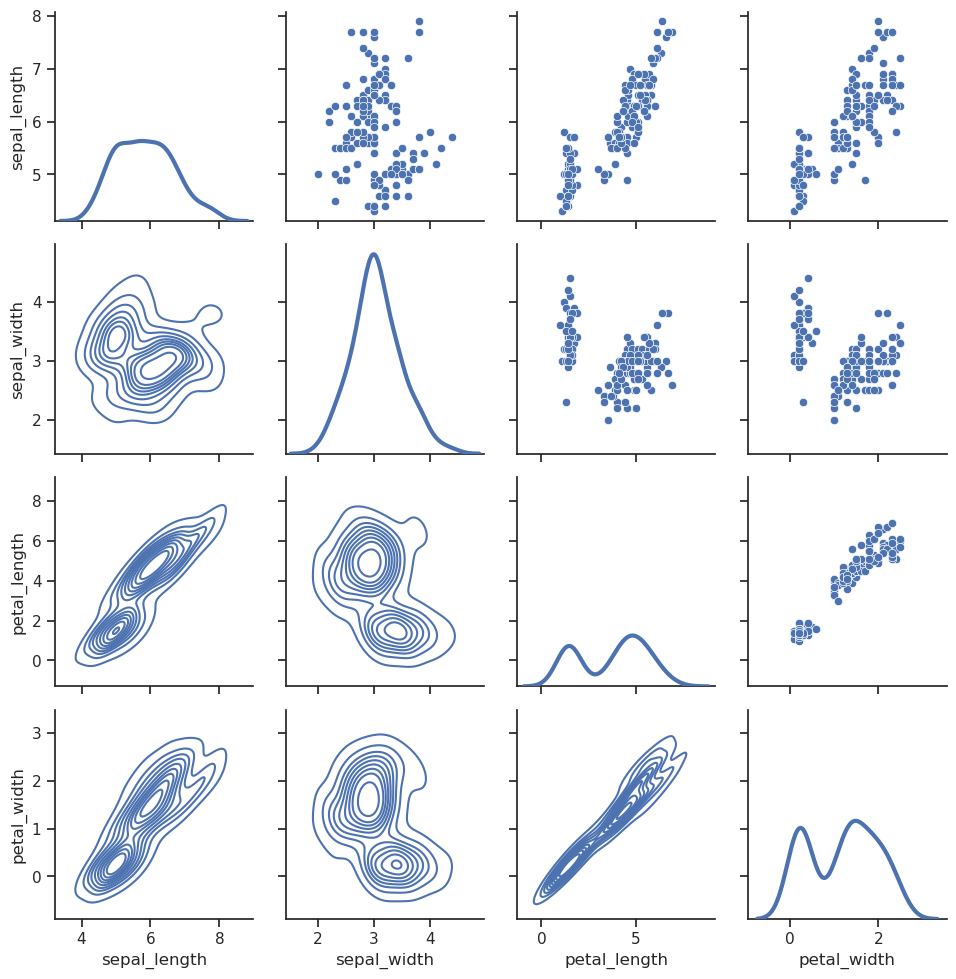

In [ ]:
g = sns.PairGrid(iris) # Initialize a PairGrid with the iris dataset, assigning it to g
g.map_upper(sns.scatterplot) # Map a scatter plot to the upper triangle subplots
g.map_lower(sns.kdeplot) # Map a kernel density estimate plot to the lower triangle subplots, do the kde's make sense here with the y axis label?
g.map_diag(sns.kdeplot, lw=3, legend=False) # Map a kernel density estimate plot to the diagonal subplots with line width 3 and no legend

The square grid with identity relationships on the diagonal is actually just a special case, and you can plot with different variables in the rows and columns.

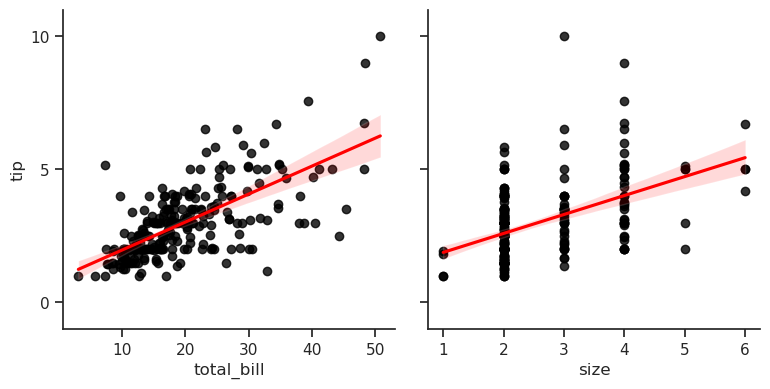

In [42]:
#initialize a PairGrid plot function and assign it to g
g = sns.PairGrid(tips, #use the tips dataset
                 y_vars=["tip"], #specify the y variable for the grid
                 x_vars=["total_bill", "size"], #specify the x variables for the grid, since we have two x variables, we will make two columns
                 height=4) #set the height of each facet

g.map(sns.regplot, # Map a regression plot to each subplot
      #set the color of the scatter points
      scatter_kws={"color": "black"}, #set the color of the scatter points
      color="red", #set the color of the regression line
        #ci=None, # Do not display confidence intervals for the regression line
        #set the linetype of the regression line
        #line_kws={"linestyle": "--"}
)      
g.set(ylim=(-1, 11), yticks=[0, 5, 10]) #set the y-axis limits and ticks

Of course, the aesthetic attributes are configurable. For instance, you can use a different palette (say, to show an ordering of the ``hue`` variable) and pass keyword arguments into the plotting functions.

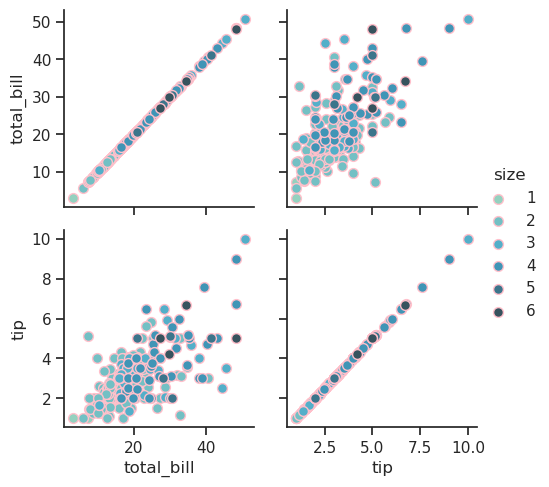

In [5]:
#initialize a PairGrid and assign it to g
g = sns.PairGrid(tips, #use the tips dataset
                 hue="size", #set the hue to 'size' to differentiate by color
                 palette="GnBu_d") #set the color palette to a green-blue gradient
g.map(plt.scatter, #use matplotlib's scatter function to plot
      s=50, #set the size of the scatter points
      edgecolor="pink") #set the edge color of the scatter points
g.add_legend()

Now we will explore [Regression Fits](./Mod9-regression.ipynb)